In [2]:
import pandas as pd
import glob
import os
from tqdm import tqdm
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import zscore

In [4]:
DAY2IDX = {"Monday":0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6}
TIME2IDX = {"Morning":0, "Afternoon":1, "Evening":2, "Night":3}

def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 0
    elif 12 <= hour < 18:
        return 1
    elif 18 <= hour < 24:
        return 2
    else:
        return 3

In [ ]:
dir_items = os.listdir("./final_csv_files")
req_folders = ["data_8", "data_9"]
folders = [item for item in dir_items if os.path.isdir(os.path.join("./final_csv_files", item)) and item in req_folders]  #  and item in req_folders
dataframes = []
for idx, folder in enumerate(folders): #################################
    print(folder)
    data_files = glob.glob(f"./final_csv_files/{folder}/*.csv") # Take 'n' number of files from each location
    for file in tqdm(data_files):
        df = pd.read_csv(file)
        # df = df[(5875 >= df["frequency"]) & (df["frequency"] >= 5725)]
        # df = df.loc[(df["frequency"] - 2412).abs().idxmin()]
        df = df[df["frequency"]==2461.984] # 2411.978, 2436.981, 2461.984, 2483.987
        closest_freq = df["frequency"]
        closest_power = df["power"]
        power_value = df.loc[df['frequency'] == 2461.984, 'power'].values[0]
        filename = os.path.basename(file)
        timestamp = int(filename.split('-')[1].split('.')[0])
        local_dt = datetime.fromtimestamp(timestamp)
        day = local_dt.strftime('%A')
        time_of_day = get_time_of_day(local_dt.hour)
        df["Day"] = DAY2IDX[day]
        # df["Time_of_Day"] = TIME2IDX[time_of_day]
        df["Time"] = local_dt.time()
        df["Location"] = idx
        dataframes.append(df)
        date = local_dt.strftime('%x')
        df["Date"] = local_dt
        # dataframes.append([value, DAY2IDX[day], TIME2IDX[time_of_day], idx, date])

# main_df = pd.DataFrame(dataframes, columns=["Power", "Day", "Time_of_Day", "Location", "Date"])
main_df = pd.concat(dataframes, ignore_index=True)
main_df = main_df.drop(columns=["center_freq"])

data_0


100%|██████████| 2570/2570 [01:20<00:00, 31.75it/s]


data_1


100%|██████████| 1110/1110 [00:34<00:00, 31.95it/s]


data_2


100%|██████████| 1354/1354 [00:43<00:00, 31.02it/s]


data_3


100%|██████████| 1226/1226 [00:39<00:00, 30.67it/s]


data_4


100%|██████████| 1076/1076 [00:34<00:00, 30.76it/s]


data_5


100%|██████████| 901/901 [00:29<00:00, 30.92it/s]


In [4]:
main_df["Date"] = pd.to_datetime(main_df["Date"])

In [8]:
main_df

,frequency,power,Day,Time,Location,Date
0,2411.978,-101.219,5,20:49:08,0,2023-12-02 20:49:08
1,2411.978,-100.516,1,11:43:00,0,2023-12-12 11:43:00
2,2411.978,-99.745,1,18:49:45,0,2023-12-12 18:49:45
3,2411.978,-100.721,2,02:10:08,0,2023-12-13 02:10:08
4,2411.978,-78.686,2,09:19:48,0,2023-12-13 09:19:48
...,...,...,...,...,...,...
8232,2411.978,-96.309,5,19:56:23,5,2025-03-15 19:56:23
8233,2411.978,-96.682,6,03:44:21,5,2025-03-16 03:44:21
8234,2411.978,-93.755,6,11:01:54,5,2025-03-16 11:01:54
8235,2411.978,-97.375,6,18:01:48,5,2025-03-16 18:01:48


In [ ]:
main_df.loc[main_df['Location'] == 0, "Location"] = 4
main_df.loc[main_df['Location'] == 1, "Location"] = 5

main_df_1 = pd.read_csv("./freq_2412.csv")
main_df = pd.concat([main_df, main_df_1], ignore_index=True)
main_df

In [ ]:
main_df.to_csv("./freq_2462.csv", index=False)

: 

In [ ]:
# main_df = main_df.drop(columns=["Location"])
# main_df.to_csv("loc0_first100.csv", index=False)
# df_0["Power"].min()
# main_df = pd.read_csv("freq_2412.csv")
# df_0 = main_df[main_df["Location"]==0]
# df_0.sort_values(by="Date", ascending=True)
# main_df = df_0

In [13]:
main_df_1

,frequency,power,Day,Time_of_Day,Location,Date
0,2411.978,-104.558,6,0,4,11/26/23
1,2411.978,-104.357,6,1,4,11/26/23
2,2411.978,-104.352,0,1,4,11/27/23
3,2411.978,-104.332,0,0,4,11/27/23
4,2411.978,-104.301,0,0,4,11/27/23
...,...,...,...,...,...,...
8232,NaN,-100.653,1,1,3,01/21/25
8233,NaN,-98.667,2,0,3,01/22/25
8234,NaN,-89.942,2,0,3,01/22/25
8235,NaN,-94.236,2,1,3,01/22/25


In [ ]:
# 0: Day (Morning and Afternoon); 1: Night (Evening and Night)
main_df_1 = main_df
main_df_1.loc[main_df_1['Time_of_Day'] == 0, "Time_of_Day"] = 0
main_df_1.loc[main_df_1['Time_of_Day'] == 1, "Time_of_Day"] = 0
main_df_1.loc[main_df_1['Time_of_Day'] == 2, "Time_of_Day"] = 1
main_df_1.loc[main_df_1['Time_of_Day'] == 3, "Time_of_Day"] = 1

In [ ]:
main_df = []
for idx, file in enumerate(os.listdir("./compressed_data/")[:8]):
    print(file)
    df = pd.read_csv("./compressed_data/"+file)
    df = df[['frequency', 'power', 'Date']]
    df['Date'] = pd.to_datetime(df['Date'])
    df['day_of_week'] = df['Date'].dt.weekday
    df['time_of_day'] = df['Date'].dt.hour
    df['location'] = idx
    main_df.append(df)

main_df = pd.concat(main_df, ignore_index=True)
main_df['time_of_day'] = main_df['time_of_day'].apply(get_time_of_day)

In [16]:
def train_model(main_df, scale=True):
    if scale:
        scaler = MinMaxScaler()
        main_df[['power']] = scaler.fit_transform(main_df[['power']])
    
    main_df = main_df[(np.abs(zscore(main_df['power'])) < 3)]

    X = main_df[["day_of_week", "time_of_day", "location", "frequency"]]
    y = main_df["power"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    weights = np.linspace(0.00001, 1, len(main_df))
    regressor = xgb.XGBRegressor(n_estimators=50, early_stopping_rounds=10, learning_rate=0.9)
    regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], sample_weight=weights[-len(y_train):], verbose=0)
    
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error (MSE):", mse)
    # mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    # print("Mean Absolute Percentage Error (MAPE):", mape, "%")
    baseline_mse = mean_squared_error(y_test, np.full_like(y_test, np.mean(y_train)))
    print("Base-line MSE: ", baseline_mse)
    # cv_rmse = (root_mean_squared_error(y_test, y_pred)) / np.median(y_test)
    # print("Coefficient of Variation (CV) of RMSE:", cv_rmse)
    print("R² Score:", regressor.score(X_test, y_test))

In [17]:
def get_location_wise_stats():
    for location in range(8):
        print(f"Location: {location}")
        df = main_df[main_df["location"]==location]
        train_model(df, scale=False)
        print("\n")

def get_time_wise_stats():
    for time in range(4):
        print(f"Time of the Day: {time}")
        df = main_df[main_df["time_of_day"]==time]
        train_model(df, scale=False)
        print("\n")

def get_day_wise_stats():
    for day in range(7):
        print(f"Day of the week: {day}")
        df = main_df[main_df["day_of_week"]==day]
        train_model(df, scale=False)
        print("\n")

get_location_wise_stats()
# train_model(main_df, scale=False)

Location: 0
Mean Squared Error (MSE): 16.925343711348777
Base-line MSE:  105.62566676774357
R² Score: 0.83976106489778


Location: 1
Mean Squared Error (MSE): 7.588835563222819
Base-line MSE:  161.45067035150046
R² Score: 0.9529959482145992


Location: 2
Mean Squared Error (MSE): 16.8722401628461
Base-line MSE:  114.14558098296057
R² Score: 0.8521866528606687


Location: 3
Mean Squared Error (MSE): 10.615529441473681
Base-line MSE:  117.13448954225272
R² Score: 0.9093731449518121


Location: 4
Mean Squared Error (MSE): 17.118811338856762
Base-line MSE:  126.25004317047102
R² Score: 0.8644053378584553


Location: 5
Mean Squared Error (MSE): 31.19879260315995
Base-line MSE:  62.51468241590584
R² Score: 0.5009365574992378


Location: 6
Mean Squared Error (MSE): 8.546668812775044
Base-line MSE:  157.8854339540428
R² Score: 0.9458678947687993


Location: 7
Mean Squared Error (MSE): 10.409646490337904
Base-line MSE:  124.80094805342866
R² Score: 0.9165899721471189




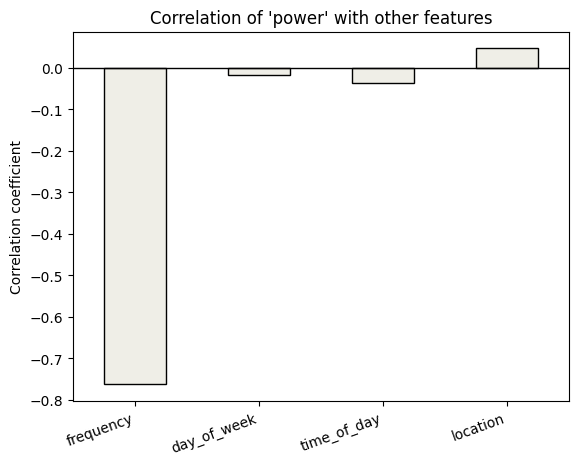

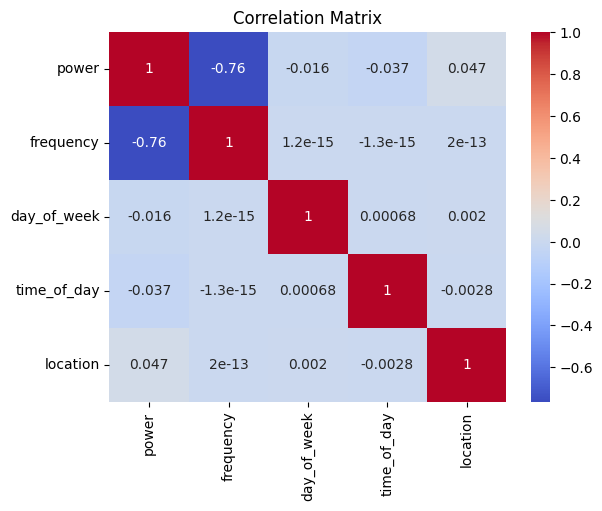

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_main = main_df.drop(["Date"], axis=1)
# corr_matrix = df_main.corr()
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
# plt.show()

df_main = main_df.drop(["Date"], axis=1)

corr_matrix = df_main.corr()
power_corr = corr_matrix["power"].drop("power")
power_corr.plot(kind='bar', color='#efeee7', edgecolor='black')
plt.title("Correlation of 'power' with other features")
plt.ylabel("Correlation coefficient")
plt.xticks(rotation=20, ha='right')
# plt.grid(True)
plt.axhline(y=0, color='black', linewidth=1)
plt.show()

cols = ['power'] + [col for col in corr_matrix.columns if col != 'power']
corr_matrix = corr_matrix.loc[cols, cols]
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

weights = np.linspace(0.00001, 1, len(main_df))
regressor = xgb.XGBRegressor(n_estimators=50, early_stopping_rounds=10)
regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], sample_weight=weights[-len(y_train):], verbose=0)
# regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# regressor.fit(X_train, y_train)
# regressor = lgb.LGBMRegressor(n_estimators=100)
# regressor.fit(X_train, y_train)
# cat = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.025, verbose=0)
# cat.fit(X_train, y_train)
# mlp = MLPRegressor(hidden_layer_sizes=(512, 256), max_iter=500, random_state=42)
# mlp.fit(X_train, y_train)
print("R² Score:", regressor.score(X_test, y_test))

R² Score: 0.3990731984461183


In [98]:
print("R² Score:", regressor.score(X_test, y_test))

R² Score: 0.3990731984461183


In [96]:
regressor.feature_importances_

array([0.00666157, 0.03087645, 0.962462  ], dtype=float32)

In [26]:
main_df["power"].min()

0.0

In [97]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, regressor.predict(X_test))
print(f"R² Score: {r2}")

R² Score: 0.3990731984461183


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

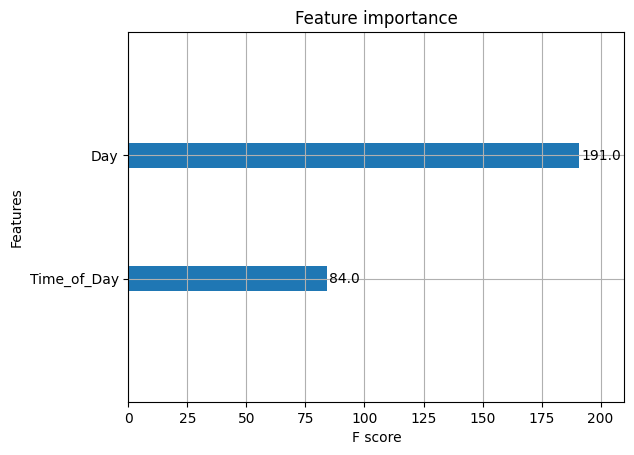

In [61]:
xgb.plot_importance(regressor)
# plt.show()

Results:

weights .1 to 1; lr = default; non standardise; mse = 3.53; min = -117.38; max = -48.64; baselinemse: 129.38; r2 = .903

weights .001 to 1; lr = default; standard scaler; mse = .309; min = -1.76; max = 4.33; baselinemse: 1.0001; r2 = .9043

weights .001 to 1; lr = default; min max scaler; mse = .5057; min = 0; max = 1; baselinemse: 0.026; r2 = .9043

900 to 928: rmse 0.078, min max scaler, r2 = 0.47, 300 csvs from each location; 0.57 Million rows; Feature imp: 15-82

2400 to 2500: rmse 0.064, min max scaler, r2 = 0.82, 300 csvs from each location; 2.22 Million rows; Feature imp: 21-73

5725 to 5875: rmse 0.061, min max scaler, r2 = 0.38, 300 csvs from each location; 3.32 Million rows; Feature imp: 40-52